In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)

# Display first few rows
print(df.head())

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
# Check for missing values
print(df.isna().sum())

# Check column info
print(df.info())

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [ ]:
# Assign column names
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']

# Display first few rows with new column names
print(df.head())

# Check for missing values
print(df.isna().sum())


   Recency  Frequency  Monetary  Time  Donated
0        2         50     12500    98        1
1        0         13      3250    28        1
2        1         16      4000    35        1
3        2         20      5000    45        1
4        1         24      6000    77        0
Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64


In [ ]:
# Features and target
X = df.drop('Donated', axis=1)
y = df['Donated']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed evaluation
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


Accuracy: 0.78


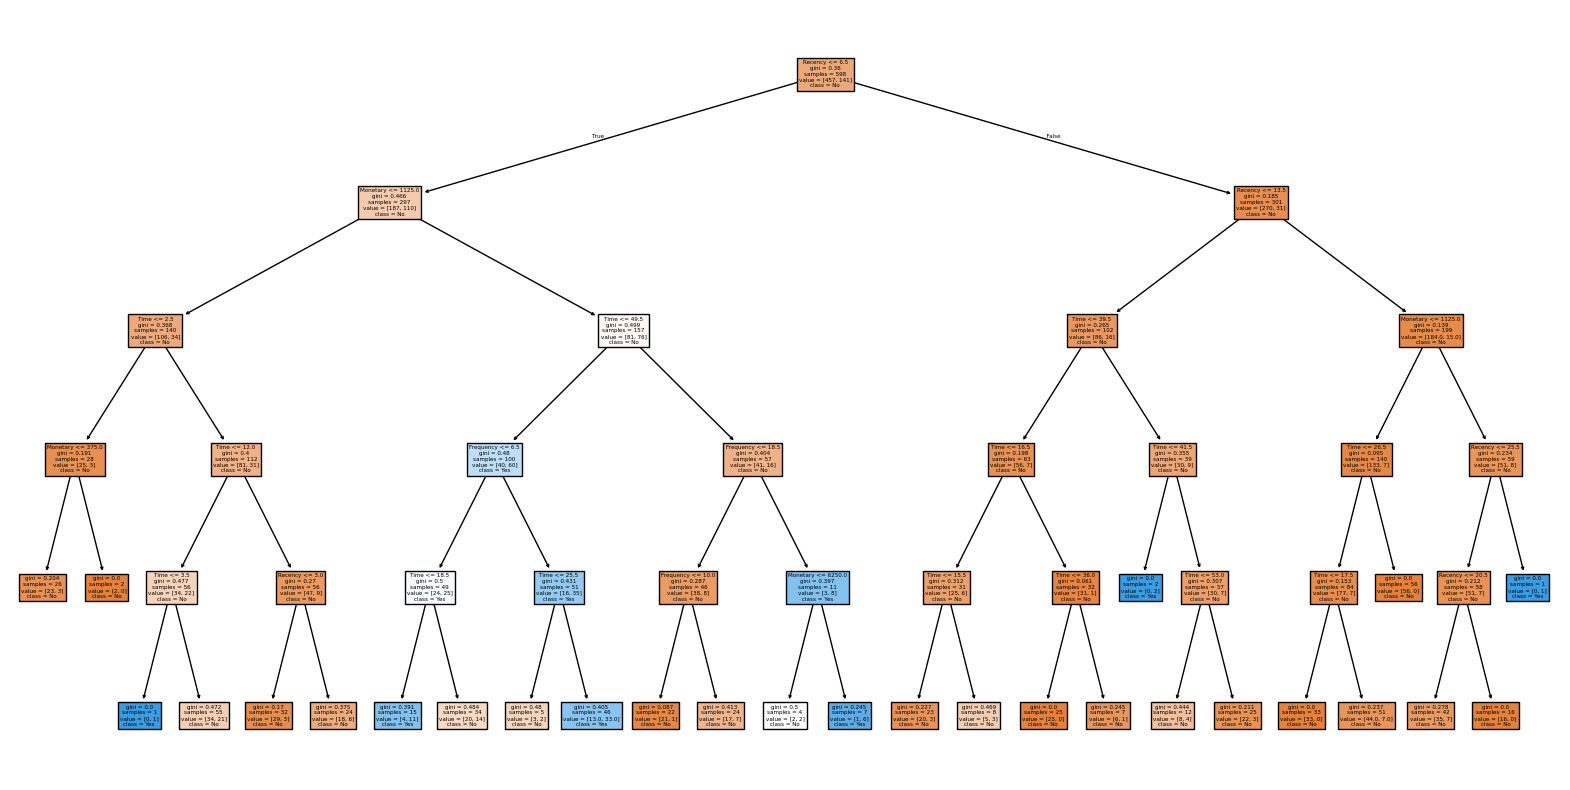

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


After Tuning

In [ ]:
# Hyperparameter tuning options
params = [
    {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5},
    {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 6},
    {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5},
    {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6}
]

In [ ]:
# Train and evaluate different models
for param in params:
    clf = DecisionTreeClassifier(criterion=param['criterion'], max_depth=param['max_depth'],
                                min_samples_split=param['min_samples_split'], random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Params: {param}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       113
           1       0.64      0.24      0.35        37

    accuracy                           0.78       150
   macro avg       0.72      0.60      0.61       150
weighted avg       0.76      0.78      0.74       150

[[108   5]
 [ 28   9]]
--------------------------------------------------
Params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 6}
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       113
           1       0.33      0.27      0.30        37

    accuracy                           0.69       150
   macro avg       0.55      0.55      0.55       150
weighted avg       0.67      0.69      0.68       150

[[93 20]
 [27 10]]
--------------------------------------------------
Params: {'criterion': 'entropy',

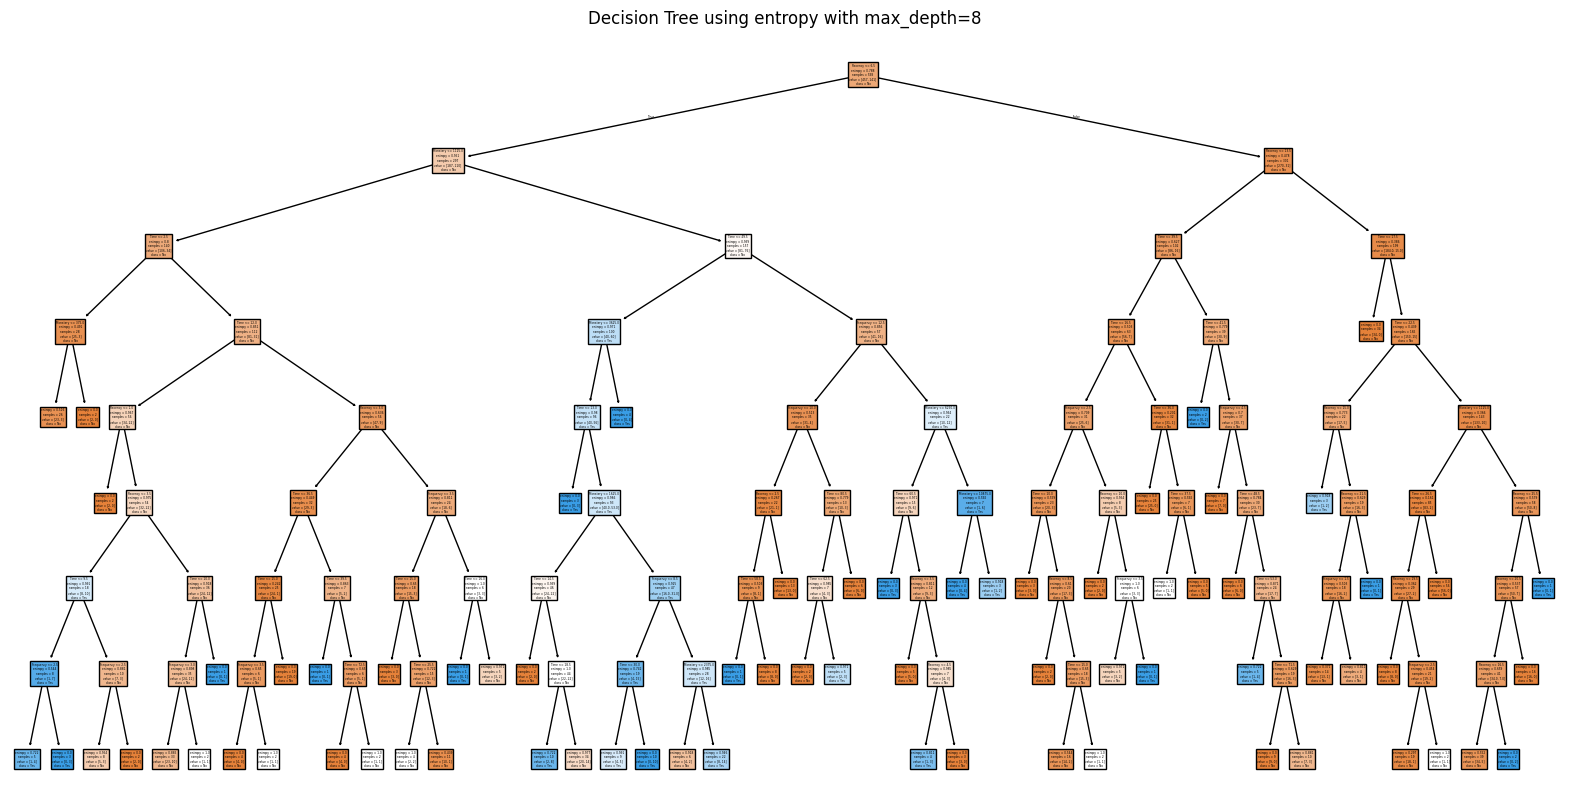

In [ ]:
 # Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title(f"Decision Tree using {param['criterion']} with max_depth={param['max_depth']}")
plt.show()